<a href="https://colab.research.google.com/github/sirinao/Playstore-Analysis/blob/main/Playstore_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

Project Title - Platstore Analysis

Project Type - EDA

Contribution - Individual

Name - Siri Chandana Tammineni

# **Project Summary -**

##**Context:**

The Play Store apps data has enormous potential to drive app-making businesses to success. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

playstore data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app

##**Object :**

Explore and analyze the data to discover key factors responsible for app engagement and success.

##**GitHub Link -**

# **General Guidelines** : -  
1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


#**Know Your Data**

##**Import Libraries**

In [182]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt

##**Mounting my google drive**

In [183]:
#mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading the Dataset**

In [184]:
# Load Dataset of play store

data = '/content/drive/MyDrive/Almabetter/Project/Data/Play Store Data.csv'
store = pd.read_csv(data)

In [185]:
# Load Dataset of users

data2 = '/content/drive/MyDrive/Almabetter/Project/Data/User Reviews.csv'
user = pd.read_csv(data2)

#**Dataset 1 : Exploring User_review dataframe**

##**Dataset First View**

In [186]:
# Dataset First Look
store.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


##**Description:**

App: Application name

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Price: Price of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category)

##**Dataset Information**

In [187]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


##**Dataset Rows & Columns count**

In [188]:
# Dataset Rows & Columns count
store.shape

(10841, 13)

In [189]:
# Dataset Describe
store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


##**Missing Values/Null Values**

In [190]:
# Missing Values/Null Values Count
store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [191]:
# Dataset Duplicate Value Count
store.duplicated().sum()

483

In [192]:
ps = store.copy()

##**Cleaning the Data**

In [193]:
# Removing the rows containing NaN values in the Android Ver column

ps = ps[~ps['Android Ver'].isnull()]

In [194]:
# Removing the rows containing NaN values in the Current Ver column

ps = ps[~ps['Current Ver'].isnull()]

In [195]:
ps.shape

(10830, 13)

In [196]:
#Are majority of the apps Paid or Free?
ps[['Type']].value_counts()

Type
Free    10032
Paid      797
dtype: int64

In [197]:
ps[ps["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [198]:
# giving values to the rows containing NaN values in the Type column

ps.loc[9148,'Type']='Free'

In [199]:
ps[ps["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<ipython-input-200-74f8272b06ca>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Rating', ylabel='Density'>

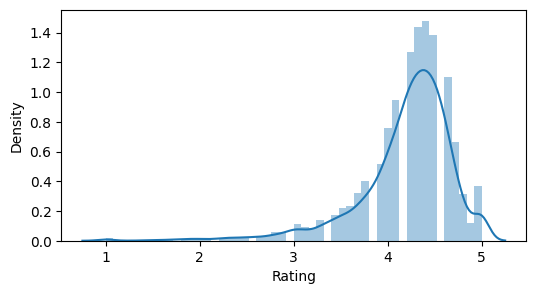

In [200]:
fig = plt.subplots(figsize=(6,3))
sns.distplot(ps['Rating'],hist=True)

In [201]:
ps['Rating'].fillna(value=0,inplace=True)

In [202]:
ps[ps["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [203]:
ps[ps['Rating'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,0.0,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,0.0,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,0.0,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,0.0,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,0.0,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,0.0,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,0.0,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,0.0,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,0.0,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [204]:
median = ps['Rating'].median()

ps.loc[ps['Rating'] == 0, 'Rating'] = median

In [205]:
ps[['App']].value_counts()

App                                              
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
                                                    ..
Display Phone Screen On TV                           1
Displaying You VR                                    1
Ditto CP Calculator GO                               1
Dive-Store.ch                                        1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Length: 9649, dtype: int64

In [206]:
# dropping duplicate

ps.drop_duplicates(subset = 'App', inplace= True)

In [207]:
ps.duplicated().sum()

0

In [208]:
ps[ps['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [209]:
#Changing the datatype of thePrice column from string to float and dropping the $
def clean(x):
  if '$' in x:
    x = float(x[1:])
  else:
    x = float(x)
  return x

In [210]:
ps['Price'] = ps['Price'].apply(lambda x: clean(x))

In [211]:
ps['Price'] = ps['Price'].astype('float')

In [212]:
ps['Price'].apply(type)

0        <class 'float'>
1        <class 'float'>
2        <class 'float'>
3        <class 'float'>
4        <class 'float'>
              ...       
10836    <class 'float'>
10837    <class 'float'>
10838    <class 'float'>
10839    <class 'float'>
10840    <class 'float'>
Name: Price, Length: 9649, dtype: object

In [213]:
ps[ps['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up


In [214]:
#Changing the datatype of the Last Updated column from string to datetime
ps['Last Updated'] = pd.to_datetime(ps['Last Updated'])

In [215]:
ps['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [216]:
ps[['Installs']].value_counts()

Installs      
1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
dtype: int64

In [217]:
#Converting the values in the Installs column from string datatype to integer datatype.
def edit(x):
  if '+' in x:
    x = int(x[:-1].replace(',',''))
  else:
    x = int(x.replace(',',''))
  return x

In [218]:
ps['Installs'] = ps['Installs'].apply(lambda x: edit(x))

In [219]:
ps['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

In [220]:
#Converting the values in theSizecolumn to a same unit of measure(MB)
def size(x):
  if 'M' in x:
    x = float(x[:-1])
  elif 'k' in x:
    x = round(float(x[:-1])/1024, 4)
  else:
    x = x
  return x

In [221]:
ps['Size'] = ps['Size'].apply(lambda x: size(x))

In [222]:
ps[ps['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device


In [223]:
ps['Size'].isnull().sum()

0

In [224]:
ps['Size'].value_counts()

Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.7041                   1
0.4199                   1
0.4189                   1
0.1953                   1
0.6045                   1
Name: Size, Length: 456, dtype: int64

<ipython-input-225-1e567cbd3ee9>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: >

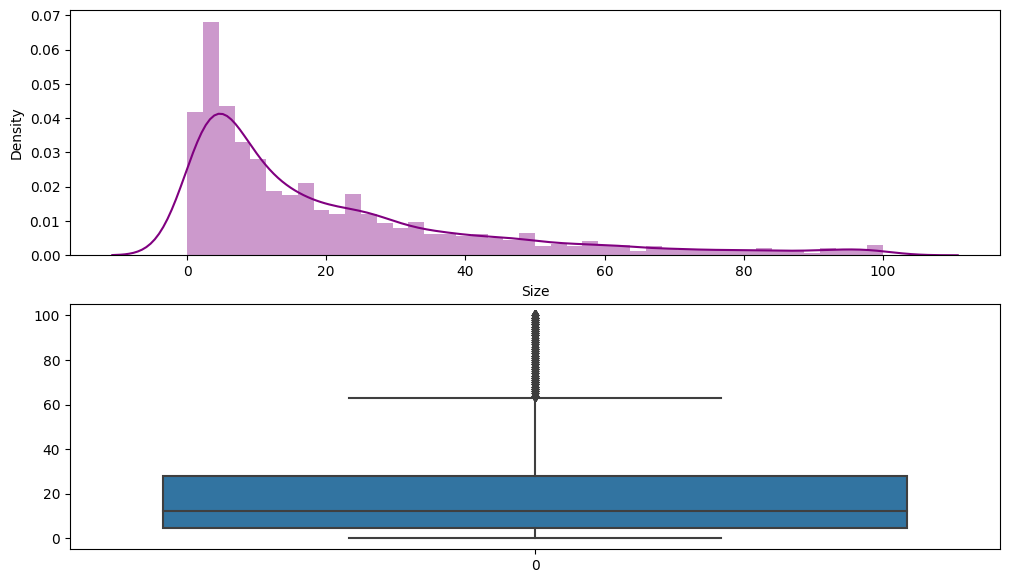

In [225]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(ps[ps['Size'] != 'Varies with device']['Size'], color='purple', ax=ax[0])
sns.boxplot(ps[ps['Size'] != 'Varies with device']['Size'], ax=ax[1])

In [226]:
mean_size = round(ps[ps['Size'] != 'Varies with device']['Size'].mean(),4)

In [227]:
ps.loc[ps['Size'] == 'Varies with device', 'Size'] = mean_size

In [228]:
ps['Size'] = ps['Size'].astype('float')

In [229]:
ps['Reviews'] = ps['Reviews'].astype('int')

In [230]:
ps.describe()

,Rating,Reviews,Size,Installs,Price
count,9649.000000,9.649000e+03,9649.000000,9.649000e+03,9649.000000
mean,4.177355,2.168145e+05,20.413561,7.785404e+06,1.100079
std,0.494541,1.832255e+06,20.397937,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.008300,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000
50%,4.200000,9.690000e+02,16.000000,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [231]:
#What are the top categories on Play Store?

ps[['Category']].value_counts()[:5]

Category
FAMILY      1829
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
dtype: int64

In [232]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


##**Visualising the Play store data**

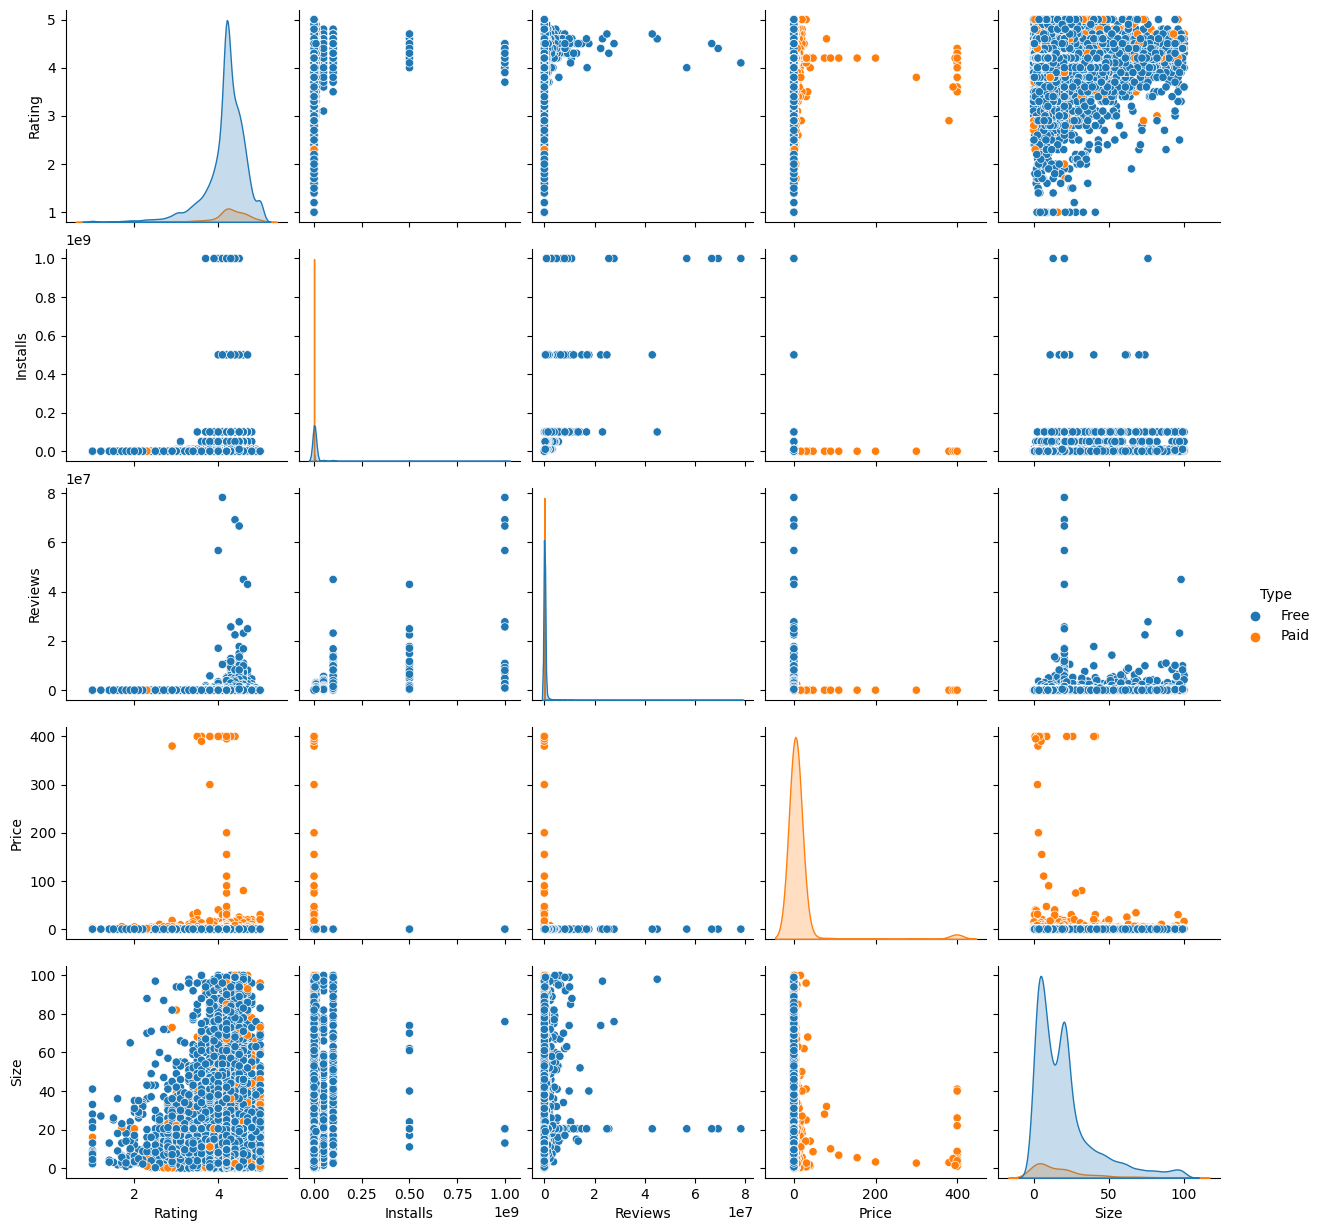

In [233]:
sns.pairplot(ps,
    x_vars=["Rating", "Installs",'Reviews','Price','Size'],
    y_vars=["Rating", "Installs",'Reviews','Price','Size'], hue='Type'
)

In [234]:
ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Text(0.5, 1.0, 'Top 10 Genre ')

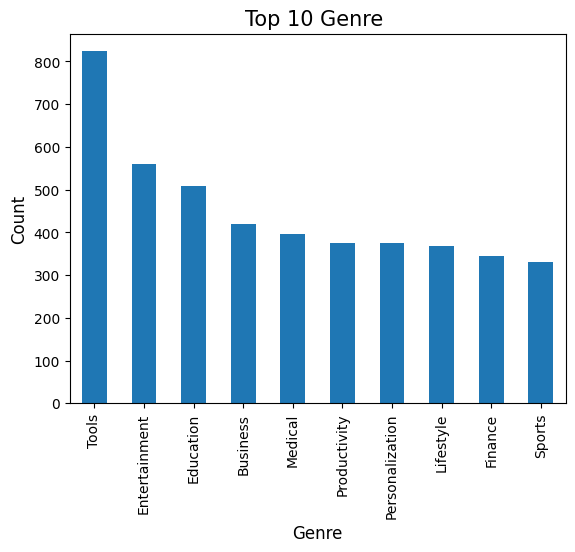

In [235]:
#Top 10 genres in playstore
top10genre = ps['Genres'].value_counts()
top10genre[:10].plot(kind='bar')
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Genre ',fontsize=15)

- In terms of no.of app of each gerne, Tools gerne has more apps in playstore.

Text(0.5, 1.0, 'Top 10 Category ')

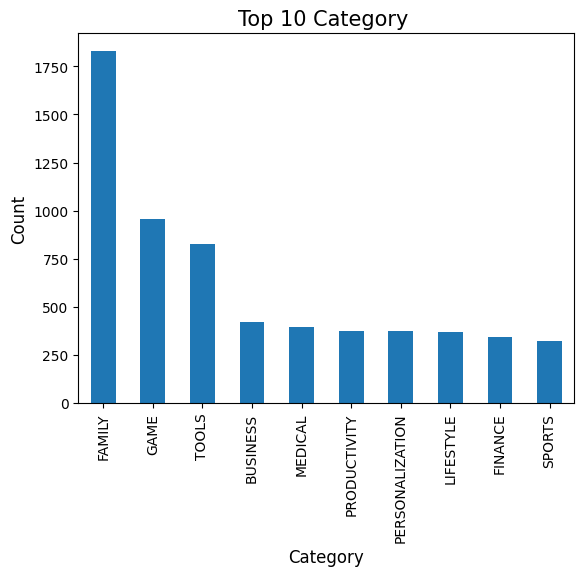

In [236]:
#Top 10 Categories
top10Category = ps['Category'].value_counts()
top10Category[:10].plot(kind='bar')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Category ',fontsize=15)

- Family Category has more no. of apps in Playstore.

<Axes: xlabel='Type', ylabel='count'>

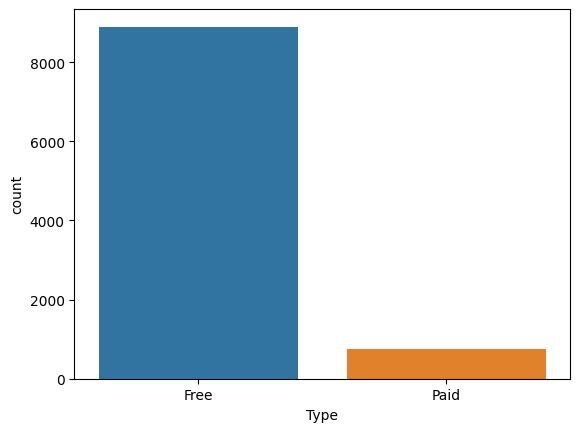

In [237]:
sns.countplot(ps,x='Type')

- Free apps are high in number.

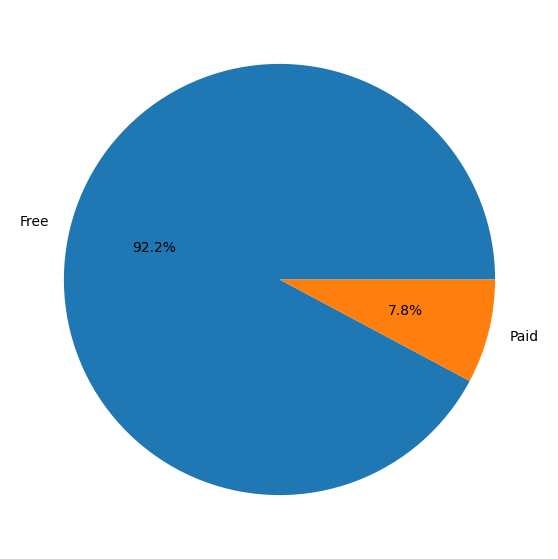

In [238]:
data = ps['Type'].value_counts()
labels = ['Free', 'Paid']

plt.figure(figsize=(7,7))
plt.pie(data, labels = labels, autopct='%1.1f%%')
plt.show()

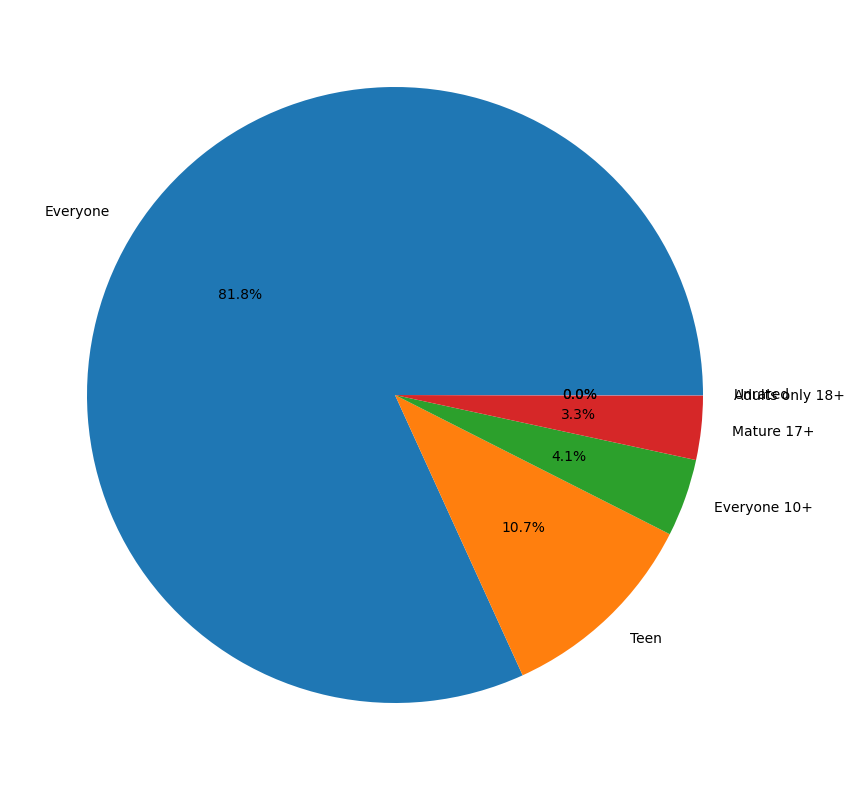

In [239]:
data = ps['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

plt.figure(figsize=(10,10))
plt.pie(data, labels = labels,autopct='%1.1f%%')
plt.show()

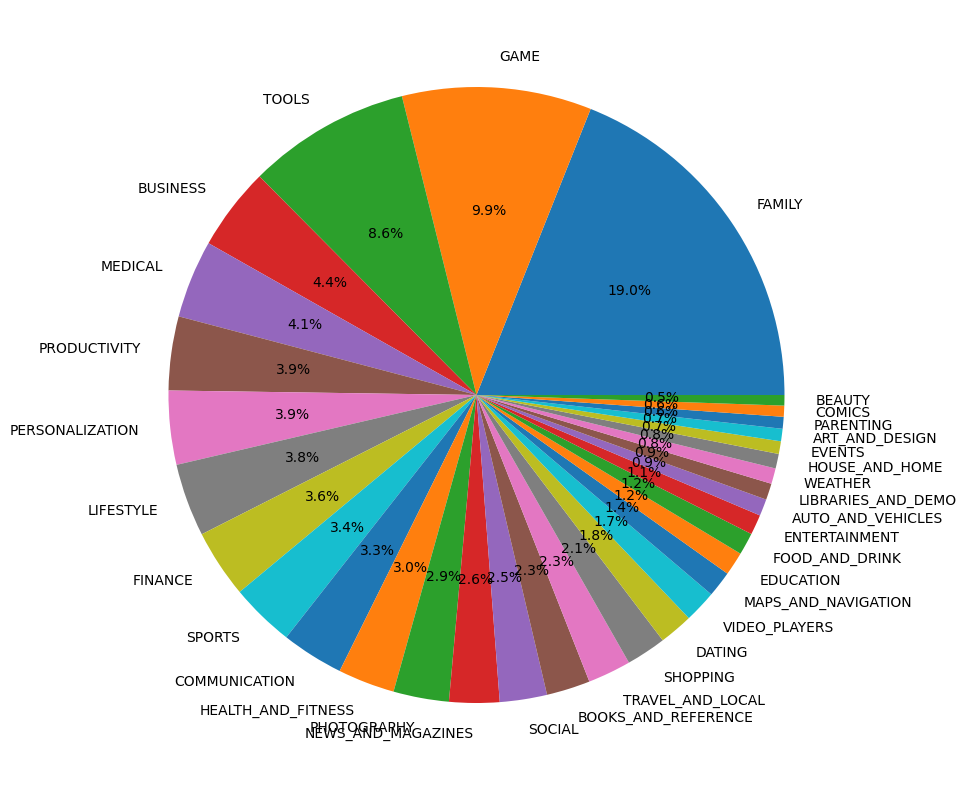

In [240]:
plt.figure(figsize=(10,10))
plt.pie(ps['Category'].value_counts(), labels = ps['Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Total app installs in each category')

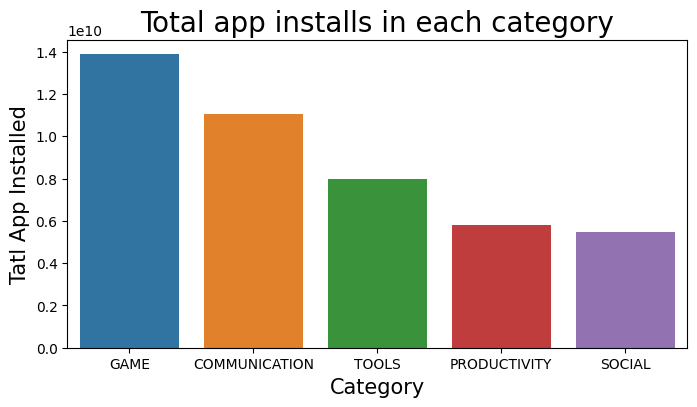

In [266]:
a = ps.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index(name="Total installs")
a = a[:5]
plt.figure(figsize=(8,4))
sns.barplot(a, x="Category", y="Total installs")
plt.ylabel('Tatl App Installed', fontsize = 15)
plt.xlabel('Category', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

Text(0.5, 1.0, 'Total app installs in each Rating')

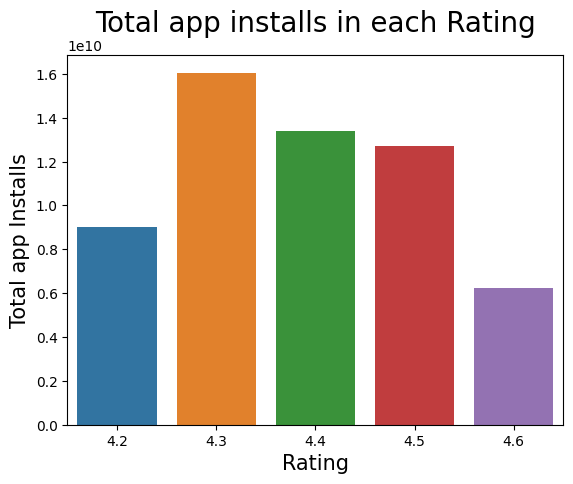

In [278]:
a = ps.groupby(['Rating'])['Installs'].sum().sort_values(ascending=False).reset_index()[:5]
sns.barplot(a, x="Rating", y="Installs")
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each Rating', fontsize = 20)

Text(0.5, 1.0, 'Rating count')

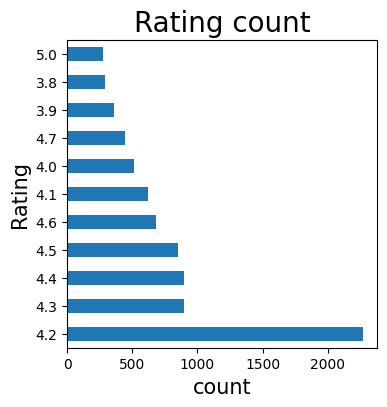

In [311]:
a = ps['Rating'].value_counts().sort_values(ascending=False)[:5]
a.plot.barh(figsize=(4,4))
plt.ylabel('Rating', fontsize = 15)
plt.xlabel('count', fontsize = 15)
plt.xticks()
plt.title('Rating count', fontsize = 20)

In [312]:
ps.corr()

<ipython-input-312-730ff92692bd>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.054032,0.053907,0.038868,-0.019378
Reviews,0.054032,1.000000,0.085642,0.625158,-0.007603
Size,0.053907,0.085642,1.000000,0.057919,-0.022484
Installs,0.038868,0.625158,0.057919,1.000000,-0.009412
Price,-0.019378,-0.007603,-0.022484,-0.009412,1.000000


<ipython-input-313-cac0663350a2>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

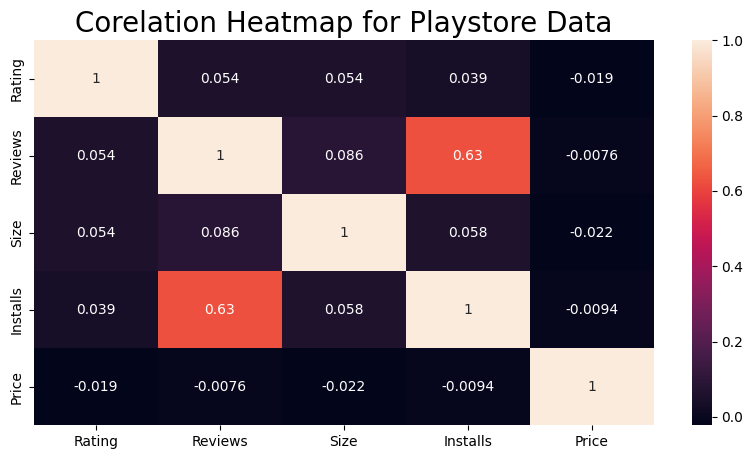

In [313]:
# Plotting correlation  matrix for all features with respect to target variable

plt.figure(figsize = (10,5))
sns.heatmap(ps.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

# **Dataset 2 :Exploring User_review dataframe**


##**Dataset First View**

In [314]:
user.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


##**Description :**

Genres: An app can belong to multiple genres (apart from its main category)

App: Name of app

Translated_Review: User review (Preprocessed and translated to English)

Sentiment: Positive/Negative/Neutral (Preprocessed)

Sentiment_Polarity: Sentiment polarity score (>0 - positive, <0 - nagative)

##**Dataset Information**

In [315]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##**Dataset Rows & Columns count**

In [316]:
user.shape

(64295, 5)

In [317]:
user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


##**Missing Values/Null Values**

In [318]:
user.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

##**Data Cleaning**

In [319]:
user = user.dropna()

In [320]:
user.shape

(37427, 5)

In [321]:
user.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [322]:
user['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

##**Data Visualization**

<Axes: xlabel='Sentiment', ylabel='count'>

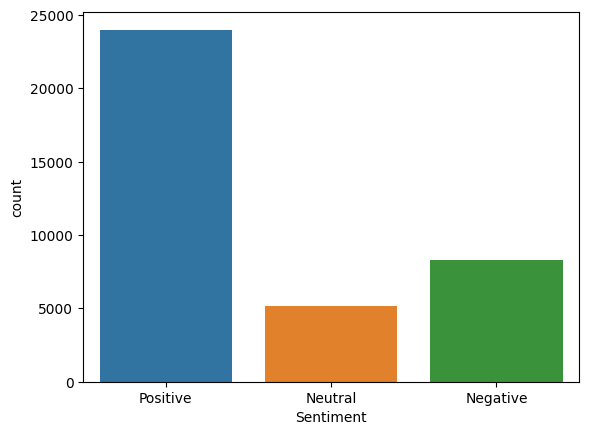

In [323]:
sns.countplot(user,x='Sentiment')

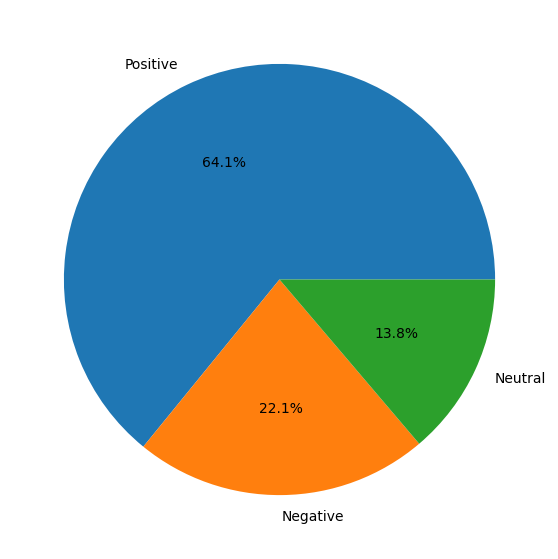

In [324]:
data = user['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral']

plt.figure(figsize=(7,7))
plt.pie(data, labels = labels,autopct='%1.1f%%')
plt.show()

#**Merging Two datasets**

In [325]:
merge = pd.merge(ps, user, on='App', how = "inner")

In [326]:
merge.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


##**Dataset Information**

In [327]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35929 entries, 0 to 35928
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     35929 non-null  object        
 1   Category                35929 non-null  object        
 2   Rating                  35929 non-null  float64       
 3   Reviews                 35929 non-null  int64         
 4   Size                    35929 non-null  float64       
 5   Installs                35929 non-null  int64         
 6   Type                    35929 non-null  object        
 7   Price                   35929 non-null  float64       
 8   Content Rating          35929 non-null  object        
 9   Genres                  35929 non-null  object        
 10  Last Updated            35929 non-null  datetime64[ns]
 11  Current Ver             35929 non-null  object        
 12  Android Ver             35929 non-null  object

##**Dataset Rows & Columns count**

In [328]:
merge.shape

(35929, 17)

In [329]:
merge.duplicated().sum()

7679

In [330]:
merge.drop_duplicates(inplace= True)

In [331]:
merge.duplicated().sum()

0

In [332]:
merge.shape

(28250, 17)

<Axes: xlabel='Type', ylabel='count'>

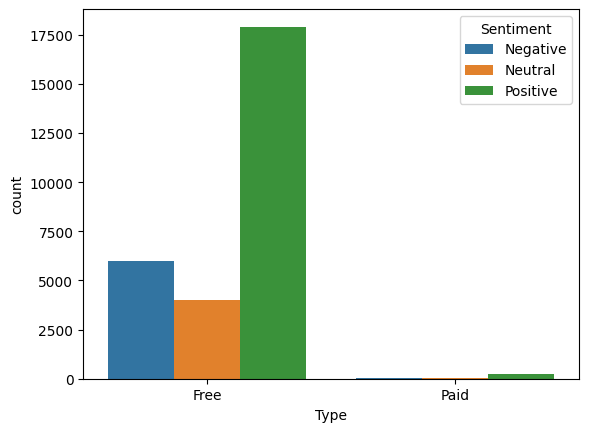

In [333]:
sns.countplot(merge, x="Type", hue="Sentiment")

In [334]:
merge.corr()

<ipython-input-334-060b1d84166f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.042358,0.102759,0.026489,-0.013222,0.111607,0.075345
Reviews,0.042358,1.000000,0.143508,0.628467,-0.015329,-0.068866,-0.004953
Size,0.102759,0.143508,1.000000,0.048848,-0.009707,-0.123566,0.010984
Installs,0.026489,0.628467,0.048848,1.000000,-0.020184,-0.052880,-0.004725
Price,-0.013222,-0.015329,-0.009707,-0.020184,1.000000,0.021172,-0.000417
Sentiment_Polarity,0.111607,-0.068866,-0.123566,-0.052880,0.021172,1.000000,0.271602
Sentiment_Subjectivity,0.075345,-0.004953,0.010984,-0.004725,-0.000417,0.271602,1.000000


<ipython-input-335-2923ee88698b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Corelation Heatmap for merge Data')

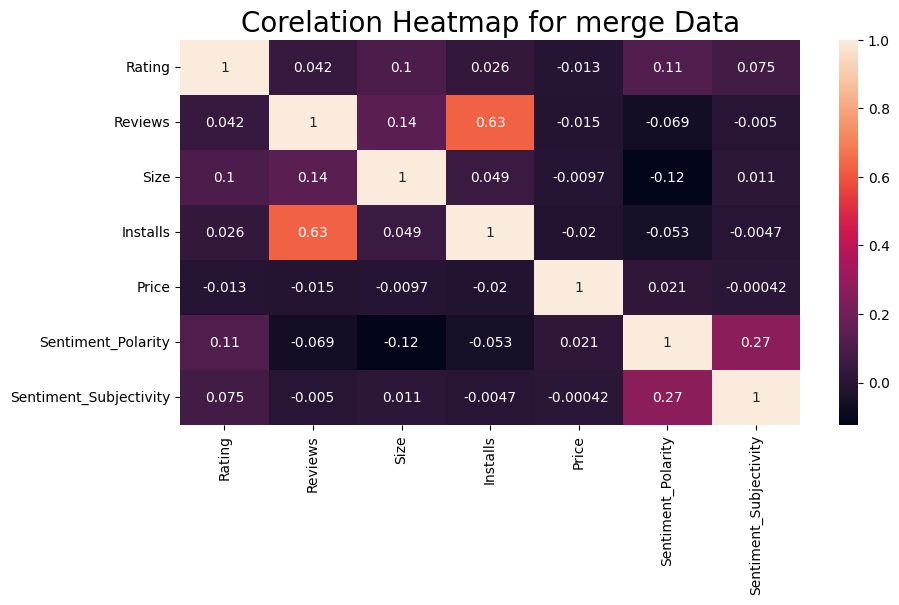

In [335]:
# Plotting correlation  matrix for all features with respect to target variable

plt.figure(figsize = (10,5))
sns.heatmap(merge.corr(), annot= True)
plt.title('Corelation Heatmap for merge Data', size=20)

In [336]:
free = merge[merge['Type'] == 'Free']
paid = merge[merge['Type'] == 'Paid']

In [337]:
free.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [338]:
free.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14437,Block Puzzle,GAME,4.6,59800,7.8,5000000,Free,0.0,Everyone,Puzzle,2018-03-06,2.9,2.3 and up,Give rating right away hound do. Which thing I...,Negative,-0.057143,0.467857


Text(0.5, 1.0, 'Total app installs in each sentiment')

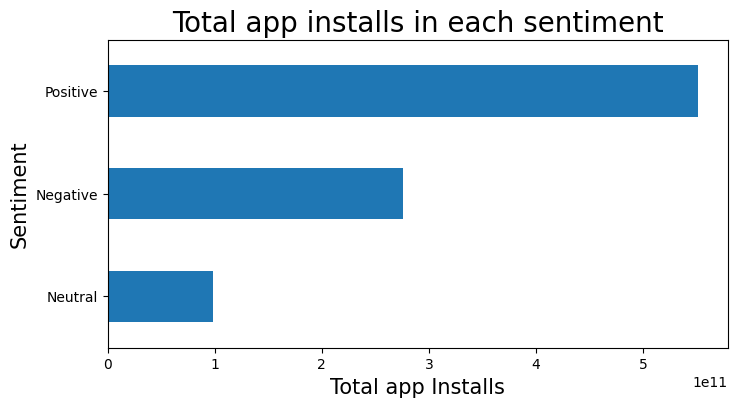

In [342]:
a = free.groupby(['Sentiment'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(8,4))
plt.ylabel('Sentiment', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each sentiment', fontsize = 20)

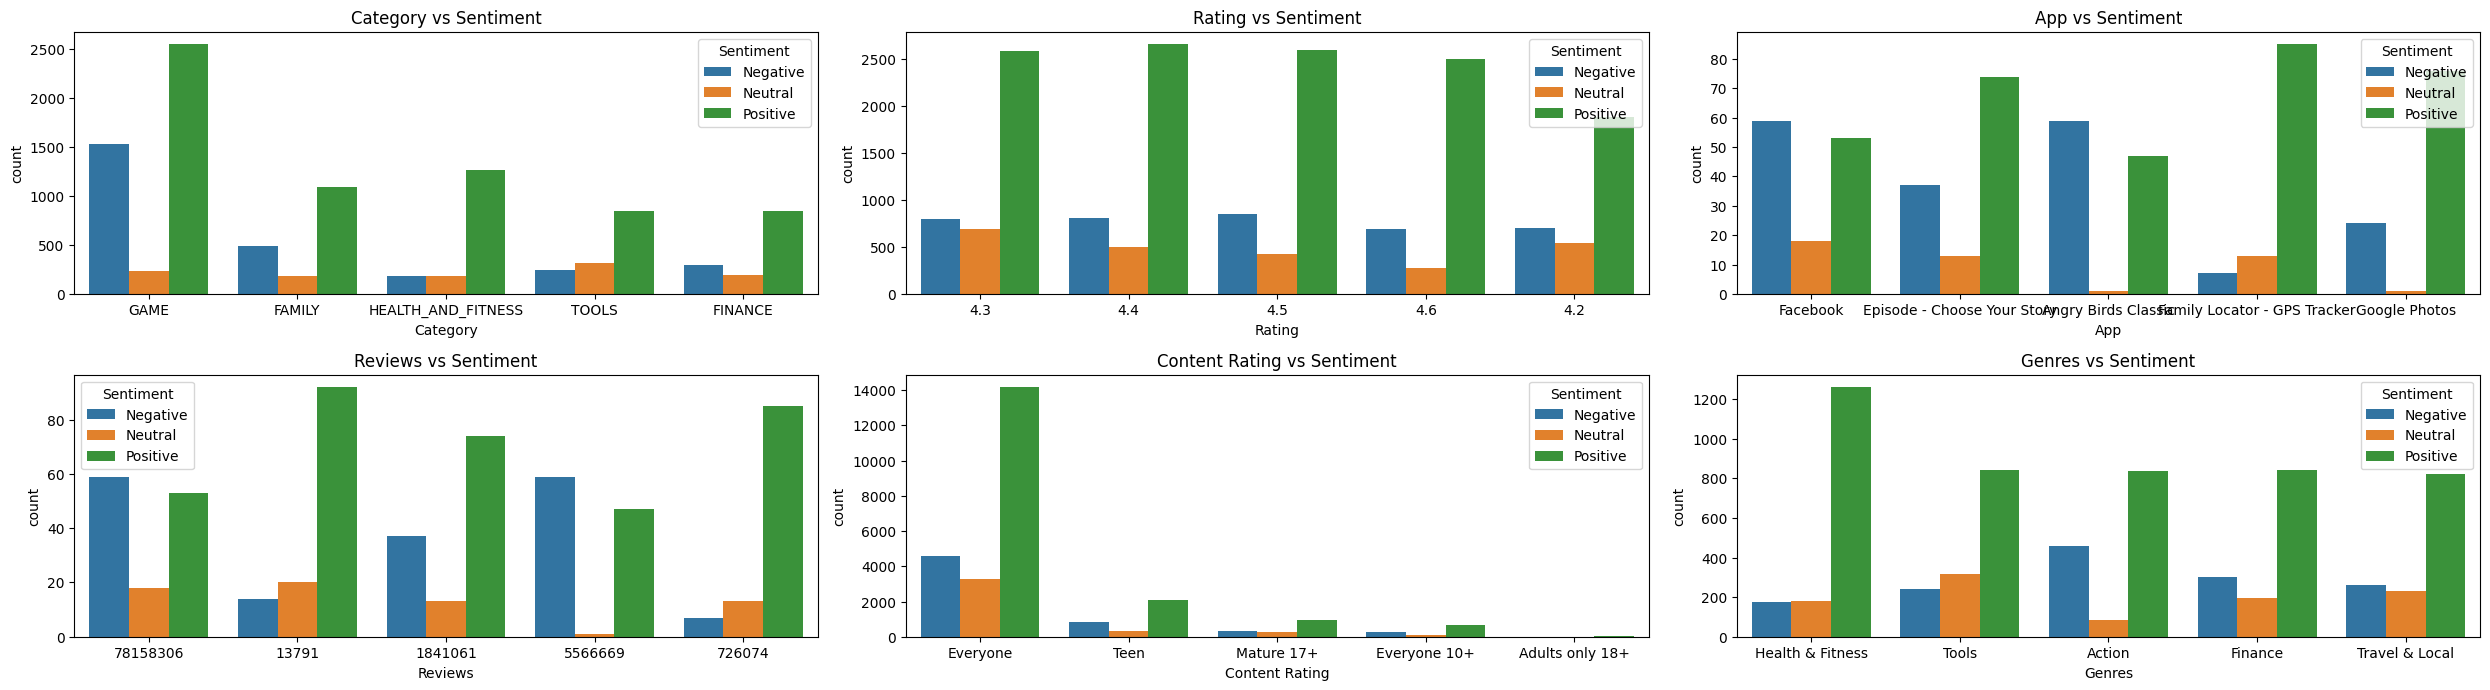

In [380]:
fig = plt.figure(figsize=(25,10))

plt.subplot(3,3,1)
plt.title("Category vs Sentiment")
sns.countplot(data = free, x='Category',hue='Sentiment',order=free['Category'].value_counts().index[0:5])

plt.subplot(3,3,2)
plt.title("Rating vs Sentiment")
sns.countplot(data = free, x='Rating',hue='Sentiment',order=free['Rating'].value_counts().index[0:5])

plt.subplot(3,3,3)
plt.title("App vs Sentiment")
sns.countplot(data = free, x='App',hue='Sentiment',order=free['App'].value_counts().index[0:5])

plt.subplot(3,3,4)
plt.title("Reviews vs Sentiment")
sns.countplot(data = free, x='Reviews',hue='Sentiment',order=free['Reviews'].value_counts().index[0:5])

plt.subplot(3,3,5)
plt.title("Content Rating vs Sentiment")
sns.countplot(data = free, x='Content Rating',hue='Sentiment',order=free['Content Rating'].value_counts().index[0:5])

plt.subplot(3,3,6)
plt.title("Genres vs Sentiment")
sns.countplot(data = free, x='Genres',hue='Sentiment',order=free['Genres'].value_counts().index[0:5])

plt.tight_layout()
plt.show()

In [370]:
paid.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
18140,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
18141,Farming Simulator 18,GAME,4.5,18125,15.0,100000,Paid,4.99,Everyone,Simulation;Education,2018-07-09,Varies with device,4.4 and up,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000


Text(0.5, 1.0, 'Total app installs in each sentiment')

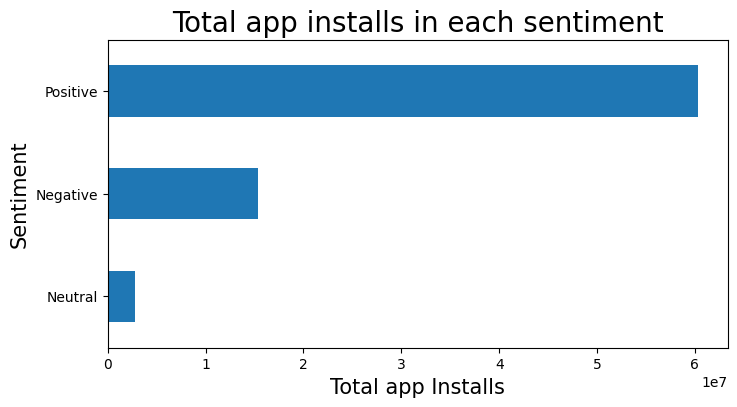

In [349]:
a = paid.groupby(['Sentiment'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(8,4))
plt.ylabel('Sentiment', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each sentiment', fontsize = 20)

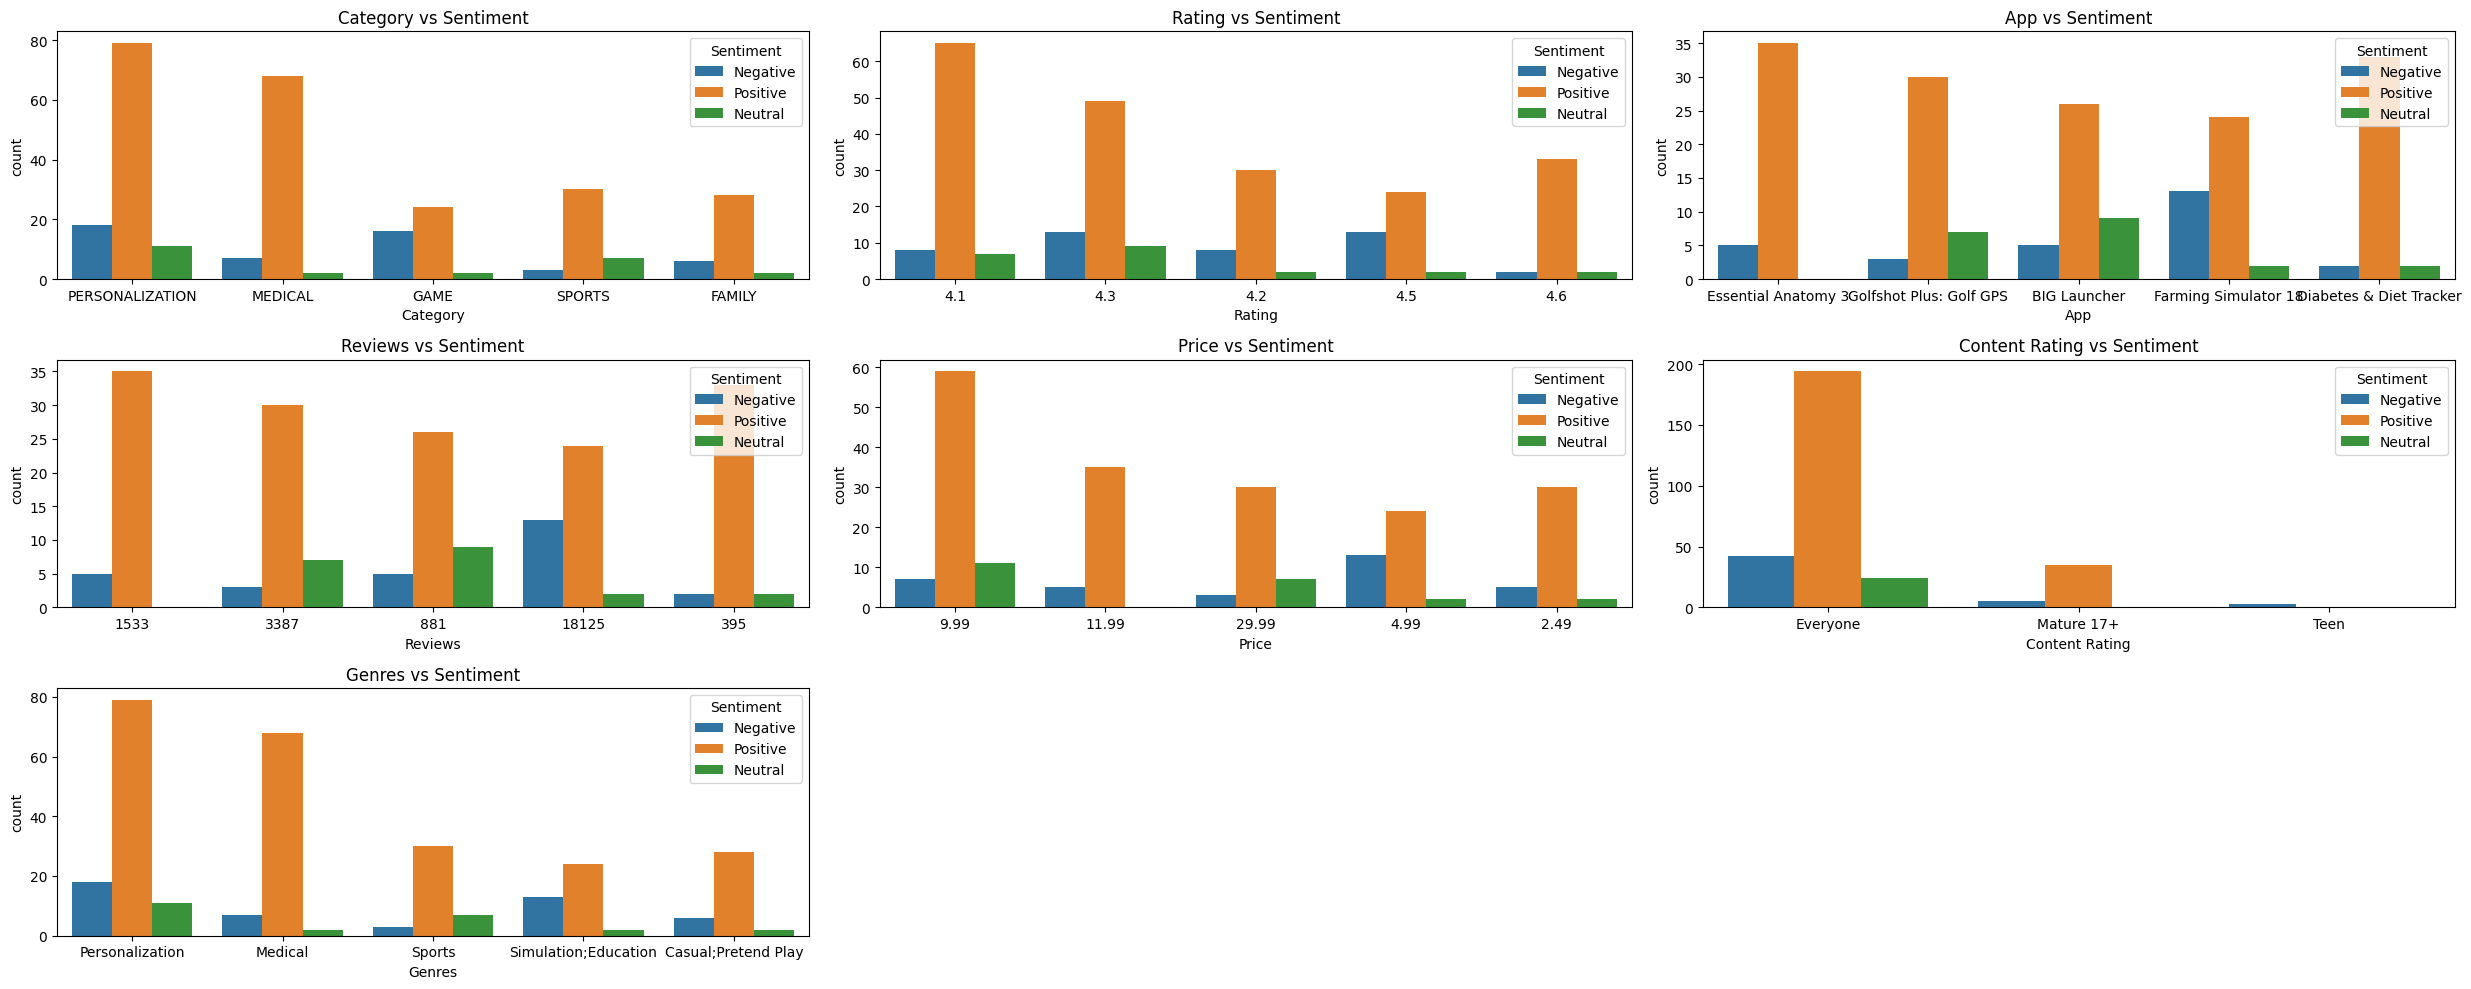

In [377]:
fig = plt.figure(figsize=(25,10))

plt.subplot(3,3,1)
plt.title("Category vs Sentiment")
sns.countplot(data = paid, x='Category',hue='Sentiment',order=paid['Category'].value_counts().index[0:5])

plt.subplot(3,3,2)
plt.title("Rating vs Sentiment")
sns.countplot(data = paid, x='Rating',hue='Sentiment',order=paid['Rating'].value_counts().index[0:5])

plt.subplot(3,3,3)
plt.title("App vs Sentiment")
sns.countplot(data = paid, x='App',hue='Sentiment',order=paid['App'].value_counts().index[0:5])
plt.subplot(3,3,4)
plt.title("Reviews vs Sentiment")
sns.countplot(data = paid, x='Reviews',hue='Sentiment',order=paid['Reviews'].value_counts().index[0:5])
plt.subplot(3,3,5)
plt.title("Price vs Sentiment")
sns.countplot(data = paid, x='Price',hue='Sentiment',order=paid['Price'].value_counts().index[0:5])
plt.subplot(3,3,6)
plt.title("Content Rating vs Sentiment")
sns.countplot(data = paid, x='Content Rating',hue='Sentiment',order=paid['Content Rating'].value_counts().index[0:5])
plt.subplot(3,3,7)
plt.title("Genres vs Sentiment")
sns.countplot(data = paid, x='Genres',hue='Sentiment',order=paid['Genres'].value_counts().index[0:5])

plt.tight_layout()
plt.show()

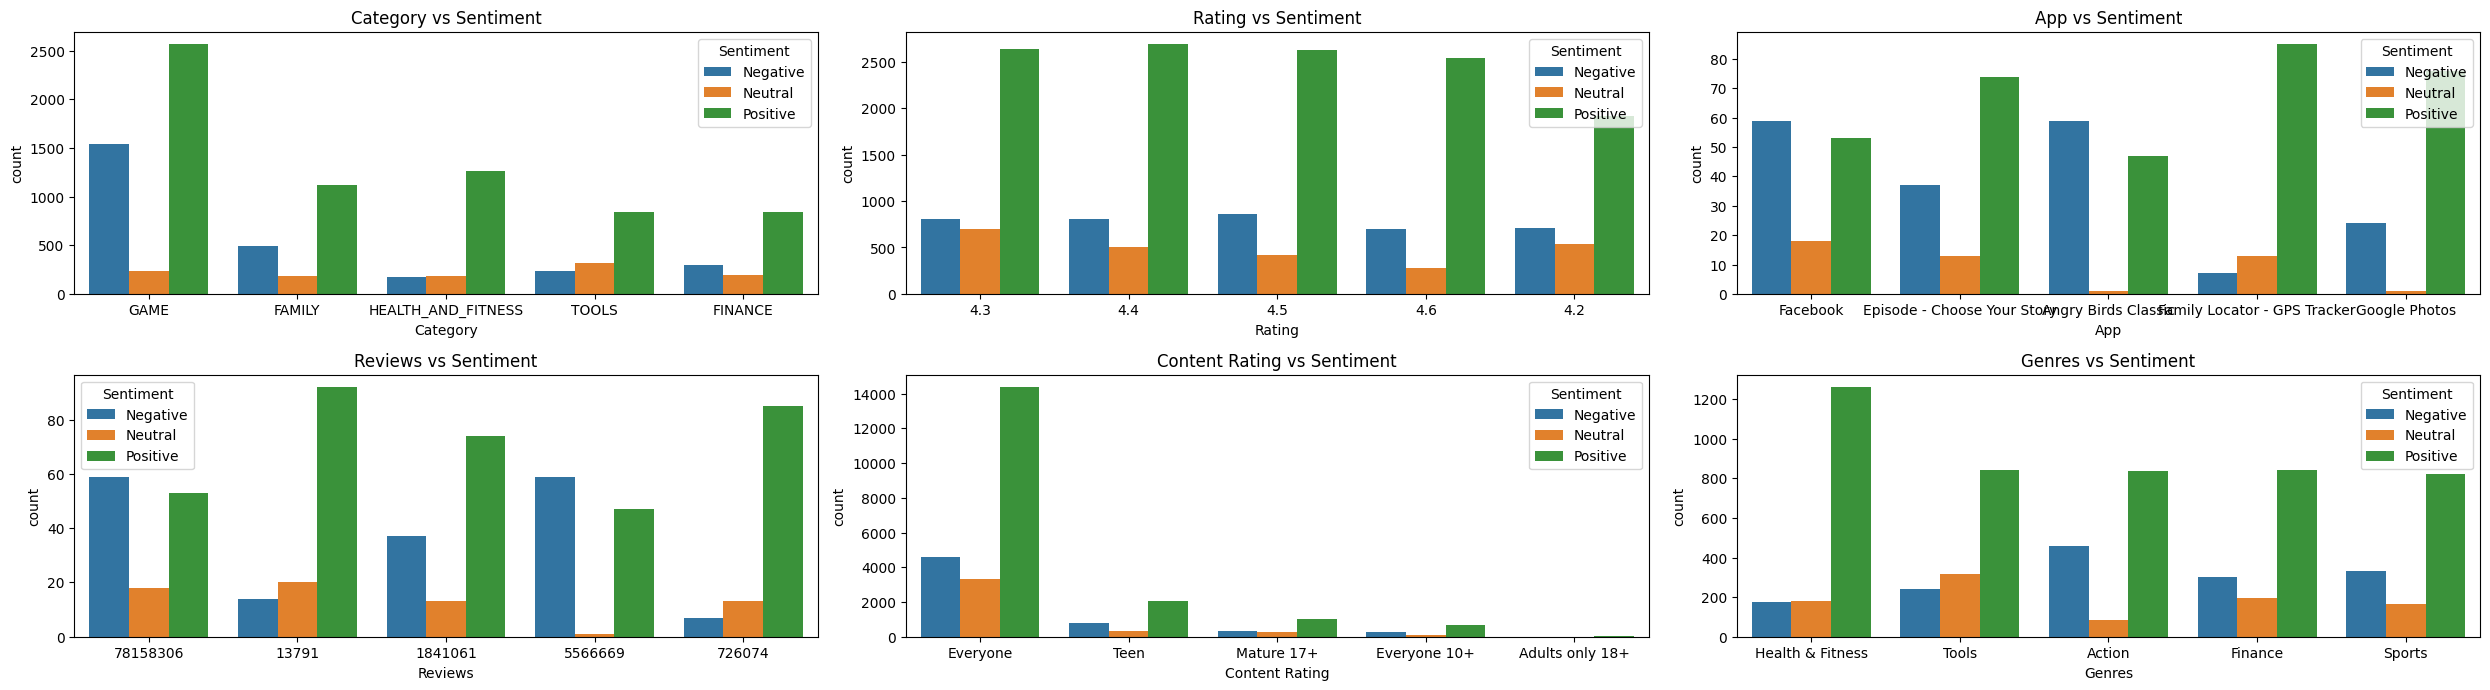

In [381]:
fig = plt.figure(figsize=(25,10))

plt.subplot(3,3,1)
plt.title("Category vs Sentiment")
sns.countplot(data = merge, x='Category',hue='Sentiment',order=merge['Category'].value_counts().index[0:5])

plt.subplot(3,3,2)
plt.title("Rating vs Sentiment")
sns.countplot(data = merge, x='Rating',hue='Sentiment',order=merge['Rating'].value_counts().index[0:5])

plt.subplot(3,3,3)
plt.title("App vs Sentiment")
sns.countplot(data = merge, x='App',hue='Sentiment',order=merge['App'].value_counts().index[0:5])

plt.subplot(3,3,4)
plt.title("Reviews vs Sentiment")
sns.countplot(data = merge, x='Reviews',hue='Sentiment',order=merge['Reviews'].value_counts().index[0:5])

plt.subplot(3,3,5)
plt.title("Content Rating vs Sentiment")
sns.countplot(data = merge, x='Content Rating',hue='Sentiment',order=merge['Content Rating'].value_counts().index[0:5])

plt.subplot(3,3,6)
plt.title("Genres vs Sentiment")
sns.countplot(data = merge, x='Genres',hue='Sentiment',order=merge['Genres'].value_counts().index[0:5])

plt.tight_layout()
plt.show()